In [1]:
# autograd functionality
import autograd.numpy as np
from autograd import value_and_grad 
from autograd.misc.flatten import flatten_func

# import pickle data loading functionality
from sklearn.externals import joblib

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

In [2]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels,start):
    # create figure
    plt.figure(figsize = (9,3))
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history[start:],label = label)
    plt.legend()
    plt.show()

# Chapter 3 Exercises

# Exercise 3.11:  Code up momentum accelerated gradient descent

In [3]:
# This code cell will not be shown in the HTML version of this notebook
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import numpy as np
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def momentum(g,alpha_choice,beta,max_its,w):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    cost_eval,grad_eval = gradient(w)
    
    # initialization for momentum direction
    h = np.zeros((w.shape))
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
        
        #### momentum step - update exponential average of gradient directions to ameliorate zig-zagging ###
        h = beta*h - (1 - beta)*grad_eval

        # take gradient descent step
        w = w + alpha*h
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

In [4]:
# define constants for a N=2 input quadratic
a1 = 0
b1 = 0*np.ones((2,1))
C1 = np.array([[0.5,0],[0,9.75]])

# a quadratic function defined using the constants above
g = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]

w = np.array([10.0,1.0]); max_its = 25; alpha_choice = 10**(-1);
beta = 0
weight_history_1,cost_history_1 = momentum(g,alpha_choice,beta,max_its,w)

beta = 0.1;
weight_history_2,cost_history_2 = momentum(g,alpha_choice,beta,max_its,w)

beta = 0.7
weight_history_3,cost_history_3 = momentum(g,alpha_choice,beta,max_its,w)

# plot histories
start = 20
cost_histories = [cost_history_1,cost_history_2,cost_history_3]
labels = [r'$\beta = 0$',r'$\beta = 0.1$',r'$\beta = 0.7$']
plot_cost_histories(cost_histories,labels,start)

<IPython.core.display.Javascript object>

# Exercise 3.12: Slow-crawling behavior of gradient descent 

In [5]:
# This code cell will not be shown in the HTML version of this notebook
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import numpy as np
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w,version):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
            
        if version == 'full':
            grad_norm = np.linalg.norm(grad_eval)
            if grad_norm == 0:
                grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            grad_eval /= grad_norm
        
        # normalize components
        if version == 'component':
            component_norm = np.abs(grad_eval) + 10**(-8)
            grad_eval /= component_norm
            
        if version == 'none':
            grad_eval = grad_eval

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

In [6]:
# define function
g = lambda w: np.tanh(4*w[0] + 4*w[1]) + max(0.4*w[0]**2,1) + 1

w = np.array([1.0,2.0]); max_its = 100; alpha_choice = 10**(-1);

version = 'none'
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w,version)
version = 'full'
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w,version)

In [7]:
plot_cost_histories([cost_history_1,cost_history_2],labels = ['original','normalized'],start=1)

<IPython.core.display.Javascript object>

# Exercise 3.13: Comparing normalized gradient descent schemes

In [8]:
# define function
g = lambda w: np.max(np.tanh(4*w[0] + 4*w[1]),0) + np.max(np.abs(0.4*w[0]),0) + 1
w = np.array([2.0,2.0]); max_its = 1000; alpha_choice = 10**(-1);

version = 'full'
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w,version)

version = 'component'
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w,version)

plot_cost_histories([cost_history_1,cost_history_2],labels = ['full-normalized','componentwise-normalized'],start=1)

<IPython.core.display.Javascript object>

# Exercise 3.14: Mini-batch gradient descent

To implement a summable function like the following simple sum of quadratics

\begin{equation}
g\left(\mathbf{w}\right) = \sum_{p=1}^P g_p(w) = \sum_{p=1}^P\left( a^{\,}_p + b_pw + c_pw^2\right)
\end{equation}

in `Python` we can leverage the built-in [`iter` function](https://www.w3schools.com/python/ref_func_iter.asp).  This allows one to easily build such functions so that we can access each of its summands.  

Take the simple example, a function that simply sums its inputs `w` based on the indecies fed in via `iter`.

In [9]:
# sum over elements of w in iter
def sum_it(w,iter):
    final_sum = 0
    for i in iter:
        final_sum += w[i]
    return final_sum

or equivalently - removing the inner `for` loop

In [10]:
# sum over elements of w in iter
def sum_it(w,iter):
    return np.sum(w[:,iter])

So, for example we can feed in the array

In [11]:
w = np.array([1,5,2,3])[np.newaxis,:]

Note: this is a two-dimensional array with shape

In [12]:
print (w.shape)

(1, 4)


and return the sum of any of its elements we choose.  So, for example, to return the sum of all elements in the array we make the call

In [13]:
# sum over all elements in the input array
sum_it(w,(0,1,2,3))

11

Notice here that we feed in a `tuple` to indicate which indices of the array we wish to iterate over.  So, for example, to add the first and second components of the input `w` we write

In [14]:
# sum over the first and last element of the input
sum_it(w,(0,3))

4

and to sum over the first two elements of the array we likewise write

In [15]:
sum_it(w,(0,1))

6

Using `iter` we can write out the sum of quadratics expressed algebraically above as shown below.  Notice in the first line we load in a set of random coefficients that will be used in this implementation.  In other words, below implement a sum o $P=100$ random quadratics whose weights are stored in the list `coeff`.

In [16]:
# load in weights of random convex quadratics
coeffs = joblib.load('random_quadratic_weights.pkl') 

# iter-based function for sum of quadratics
def g(w,iter):
    P = len(coeffs)
    cost = 0
    for i in iter:
        # get quadratic
        coeff = coeffs[i]
        a = coeff[0]
        b = coeff[1]
        c = coeff[2]

        # add to term
        cost += (a + b*w + c*w**2)
    return cost/P

FileNotFoundError: [Errno 2] No such file or directory: 'random_quadratic_weights.pkl'

With this implementation in hand, compare the full batch and mini-batch gradient descent methods to minimize this quadratic.  In particular, compare two epochs of the full batch method with two epochs of a run using mini-batch sizes $1$ and $10$.  In each instance, just measure the total cost function value after each epoch (or sweep through the cost function summands).

In [17]:
import autograd.numpy as np
from autograd import value_and_grad 
from autograd.misc.flatten import flatten_func

# minibatch gradient descent
def gradient_descent(g, alpha, max_epochs, w, num_train, batch_size):        
    # flatten the input function, create gradient based on flat function
    g_flat, unflatten, w = flatten_func(g, w)
    grad = value_and_grad(g_flat)

    # record history
    w_hist = [unflatten(w)]
    train_hist = [g_flat(w,np.arange(num_train))]
   
    # how many mini-batches equal the entire dataset?
    num_batches = int(np.ceil(np.divide(num_train, batch_size)))

    # over the line
    for k in range(max_epochs):                   
        # loop over each minibatch
        train_cost = 0
        for b in range(num_batches):
            # collect indices of current mini-batch
            batch_inds = np.arange(b*batch_size, min((b+1)*batch_size, num_train))
            
            # plug in value into func and derivative
            cost_eval,grad_eval = grad(w,batch_inds)
            grad_eval.shape = np.shape(w)
    
            # take descent step with momentum
            w = w - alpha*grad_eval
        
            # update training and validation cost
            train_cost = g_flat(w,np.arange(num_train))

            # record weight update, train and val costs
            w_hist.append(unflatten(w))
            train_hist.append(train_cost)

    return w_hist,train_hist

In [18]:
### run full batch zero-order methods ###
P = len(coeffs)
num_train = P
batch_size = P
num_train = 100
batch_size = 100
alpha_choice = 10**(0)
num_epochs = 2
N = 1
w = np.random.randn(N)

# full batch run
batch_weight_hist,batch_cost_hist = gradient_descent(g, alpha_choice, num_epochs, w, num_train, batch_size)

# make stochastic run
batch_size = 1
minibatch_weight_hist, minibatch_cost_hist = gradient_descent(g, alpha_choice, num_epochs, w, num_train, batch_size)

# make mini-batch run of size 10
batch_size = 10
minibatch_weight_hist_2, minibatch_cost_hist_2 = gradient_descent(g, alpha_choice, num_epochs, w, num_train, batch_size)

NameError: name 'coeffs' is not defined

In [ ]:

'''
Plot all three runs
- on the left, all three plotted according to the minibatch run
- on the right, all three plotted according to full batch run
'''
def compare_runs(batch_cost_hist,minibatch_cost_hist,minibatch_cost_hist_2):
    # create figure and color pattern
    fig = plt.figure(figsize = (10,3))
    colors = ['k','magenta','aqua','blueviolet','chocolate']

    ### plot all with respect to smallest mini-batch size ###
    ax = plt.subplot(1,2,1)

    # count number of steps in different runs
    num_stoch = len(minibatch_cost_hist)
    num_mini = len(minibatch_cost_hist_2)
    num_full = len(batch_cost_hist)

    # plot stochastic
    ax.plot(minibatch_cost_hist, label='batch size = 1',c = colors[0],linewidth=1.5)

    # plot mini and full batch with respect to stochastic
    range_mini = np.linspace(0,num_stoch,num_mini)
    ax.plot(range_mini,minibatch_cost_hist_2, label='batch size = 10',c = colors[1],linewidth=1)
    ax.scatter(range_mini,minibatch_cost_hist_2,c=colors[1],s=90,edgecolor = 'w',linewidth=0.5)

    range_full = np.linspace(0,num_stoch,num_full)
    ax.plot(range_full,batch_cost_hist, label='full batch',c = colors[2],linewidth=1)
    ax.scatter(range_full,batch_cost_hist,c=colors[2],s=90,edgecolor = 'w',linewidth=0.5)

    # label panel
    ax.set_title('progress with respect to batch size = 1 method')
    ax.set_xlabel('single summand')
    #plt.legend(loc = 1)

    ### plot with respect to epoch number ###
    ax = plt.subplot(1,2,2)

    # plot stochastic batch
    inds_stoch = np.linspace(0,num_stoch,num_full)
    inds_stoch = [int(v) for v in inds_stoch]
    inds_stoch[-1]-=1
    plot_stoch = [minibatch_cost_hist[v] for v in inds_stoch]
    ax.plot(plot_stoch, label='batch size = 1',c = colors[0],linewidth=1.5)
    ax.scatter(np.arange(num_full),plot_stoch,c=colors[0],s=90,edgecolor = 'w',linewidth=0.5)

    # plot mini and full batch with respect to stochastic
    inds_mini = np.linspace(0,num_mini,num_full)
    inds_mini = [int(v) for v in inds_mini]
    inds_mini[-1]-=1
    plot_mini = [minibatch_cost_hist_2[v] for v in inds_mini]
    ax.plot(plot_mini, label='batch size = 10',c = colors[1],linewidth=1)
    ax.scatter(np.arange(num_full),plot_mini,c=colors[1],s=90,edgecolor = 'w',linewidth=0.5)

    # plot full cost
    ax.plot(batch_cost_hist, label='full batch',c = colors[2],linewidth=1)
    ax.scatter(np.arange(num_full),batch_cost_hist,c=colors[2],s=90,edgecolor = 'w',linewidth=0.5)
    ax.set_title('progress with respect to full batch method')
    ax.set_xticks(np.arange(num_full))
    ax.set_xlabel('full epochs')

    # plot all with respect to epoch number
    plt.show()

In [ ]:
# plot runs
compare_runs(batch_cost_hist,minibatch_cost_hist,minibatch_cost_hist_2)

Here the blue history denotes the full batch method, the pink the mini-batch with size $10$, and the black mini-batch with size $1$.

# Exercise 4 exercises

# Exercise 4.5: Newtons method I

In [19]:
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import grad 
from autograd import hessian

# newtons method function - inputs: g (input function), max_its (maximum number of iterations), w (initialization)
def newtons_method(g,max_its,w,**kwargs):
    # compute gradient module using autograd
    gradient = grad(g)
    hess = hessian(g)
    
    # set numericxal stability parameter / regularization parameter
    epsilon = 10**(-7)
    if 'epsilon' in kwargs:
        epsilon = kwargs['epsilon']

    # run the newtons method loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient and hessian
        grad_eval = gradient(w)
        hess_eval = hess(w)

        # reshape hessian to square matrix for numpy linalg functionality
        hess_eval.shape = (int((np.size(hess_eval))**(0.5)),int((np.size(hess_eval))**(0.5)))
        
        # solve second order system system for weight update
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A,np.dot(A,w) - b)
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

<IPython.core.display.Javascript object>


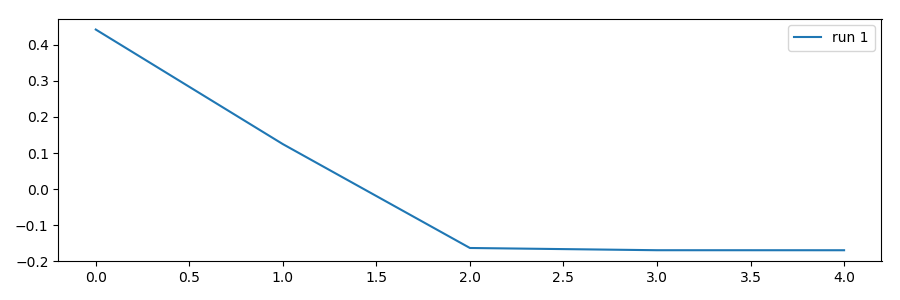

In [20]:
# This code cell will not be shown in the HTML version of this notebook
# what function should we play with?  Defined in the next line.
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)   # try other functions too!  Like g = lambda w: np.cos(2*w) , g = lambda w: np.sin(5*w) + 0.1*w**2, g = lambda w: np.cos(5*w)*np.sin(w)

# run gradient descent 
w = np.array([2.5]); max_its = 5;
weight_history,cost_history = newtons_method(g,max_its,w)

# plot history
cost_histories = [cost_history]
plot_cost_histories(cost_histories,labels=['run 1'],start=1)

# Exercise 4.7: Newton’s method and square roots

From the description of the problem we want to find the zero of

\begin{equation}
g(w) = w^2 - 999
\end{equation}

To use our generic Newton's method module we need to treat this as the derivative function - i.e., as $g^{\prime}(w)$, meaning we wish to apply Newton's method to the *antiderivative* of the function above

\begin{equation}
f(w) = \frac{1}{3}w^3 - 999w + C
\end{equation}

In [ ]:
# define function
f = lambda w: 1/float(3)*w**3 - 999*w
g = lambda w: w**2 - 999

In [ ]:
w_init = np.random.randn(1)
max_its = 10
epsilon = 1
weight_history,cost_history = newtons_method(f,max_its,w_init,epsilon=epsilon)

Lets examine our output weight history - the final entry of which should be an approximate square root value.

In [ ]:
print (weight_history[-1])

And indeed it is!

Notice if you plot the cost function history corresponding to these weights that we do not have descent at each and every step.  That is because the function we are actually minimizing is non-convex.

In [ ]:
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
cost_history = [g(w) for w in weight_history]
ax.plot(cost_history)
plt.show()

# Exercise 4.8: Non-convex minimization using Newton’s method

In [ ]:
g = lambda w: np.cos(w)
w_init = np.array([0.1]).flatten()
max_its = 10
epsilon = 1
weight_history,cost_history = newtons_method(g,max_its,w_init,epsilon=epsilon)

In [ ]:
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
cost_history = [g(w) for w in weight_history]
ax.plot(cost_history)
plt.show()

# Chapter 5 Exercises

# Exercise 5.1: Fitting a regression line to the student debt data

Load up the dataset.

In [ ]:
# import the dataset
csvname = datapath + 'student_debt_data.csv'
data = np.asarray(pd.read_csv(csvname,header = None))
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

# pad input with ones
o = np.ones((len(x),1))
x_new = np.concatenate((o,x),axis = 1)

Lets setup the linear system associated to minimizing the Least Squares cost function for this problem and solve it.

In [ ]:
# solve linear system of equations for regression fit
A = np.dot(x_new.T,x_new)
b = np.dot(x_new.T,y)
w = np.dot(np.linalg.pinv(A),b)

With our line fit to the data we can now predict total student debt in 2050.

In [ ]:
# print out predicted amount of student debt in 2050
debt_in_2050 = w[0] + w[1]*2050
print ('if this linear trend continues there will be ' + str(debt_in_2050[0]) + ' trillion dollars in student debt in 2050!')

Finally, lets print out the dataset and linear fit.

In [ ]:
# plot data with linear fit - this is optional
s = np.linspace(np.min(x),np.max(x))
t = w[0] + w[1]*s

figure = plt.figure()
plt.plot(s,t,linewidth = 3,color = 'm')
plt.scatter(x,y,linewidth = 2)
plt.xlabel('time')
plt.ylabel('debt in trillions of dollars')
plt.show()

# Chapter 7 Exercises

Load in data - using `sklearn` import functionality.

In [21]:
# load in data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

# strip off input / output pairs
x = mnist.data.T
y = mnist.target[np.newaxis,:]

In [22]:
print("input shape = " , x.shape)
print("output shape = ", y.shape)

input shape =  (784, 70000)
output shape =  (1, 70000)


Randomly sample input / output pairs.

In [23]:
# sample indices
num_sample = 50000
inds = np.random.permutation(y.shape[1])[:num_sample]
x_sample = x[:,inds]
y_sample = y[:,inds]

<IPython.core.display.Javascript object>


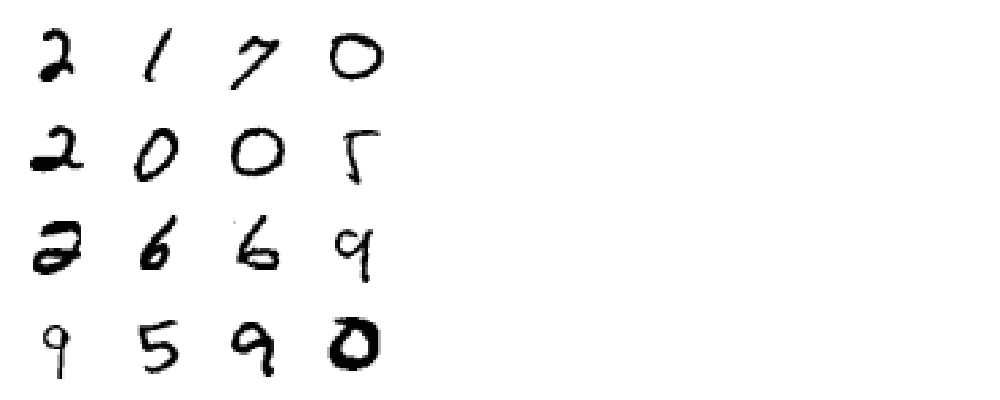

In [24]:
from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,4))
gs=GridSpec(4,10)

for i in range(0, 16):
    fig.add_subplot(gs[i%4 + int(i/4)*10])
    plt.imshow(np.max(x_sample[:,i]) - np.reshape(x_sample[:,i],(28,28)), cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.axis('off') 
plt.show()

Implementation of multi-class cost and gradient descent optimizer that takes in mini-batches.

In [25]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# multiclass perceptron
def multiclass_perceptron(w,x,y,iter):
    # get subset of points
    x_p = x[:,iter]
    y_p = y[:,iter]

    # pre-compute predictions on all points
    all_evals = model(x_p,w)

    # compute maximum across data points
    a =  np.max(all_evals,axis = 0)        

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y_p.astype(int).flatten(),np.arange(np.size(y_p))]
    cost = np.sum(a - b)

    # return average
    return cost/float(np.size(y_p))

In [26]:
from autograd.misc.flatten import flatten_func
from autograd import grad as gradient 
from timeit import default_timer as timer

# minibatch gradient descent
def gradient_descent(g,w,x_train,y_train,alpha,max_its,batch_size,**kwargs): 
    verbose = True
    if 'verbose' in kwargs:
        verbose = kwargs['verbose']
    
    # flatten the input function, create gradient based on flat function
    g_flat, unflatten, w = flatten_func(g, w)
    grad = gradient(g_flat)

    # record history
    num_train = y_train.size
    w_hist = [unflatten(w)]
    train_hist = [g_flat(w,x_train,y_train,np.arange(num_train))]

    # how many mini-batches equal the entire dataset?
    num_batches = int(np.ceil(np.divide(num_train, batch_size)))

    # over the line
    for k in range(max_its):                   
        # loop over each minibatch
        start = timer()
        train_cost = 0
        for b in range(num_batches):
            # collect indices of current mini-batch
            batch_inds = np.arange(b*batch_size, min((b+1)*batch_size, num_train))
            
            # plug in value into func and derivative
            grad_eval = grad(w,x_train,y_train,batch_inds)
            grad_eval.shape = np.shape(w)
    
            # take descent step with momentum
            w = w - alpha*grad_eval

        end = timer()
        
        # update training and validation cost
        train_cost = g_flat(w,x_train,y_train,np.arange(num_train))

        # record weight update, train and val costs
        w_hist.append(unflatten(w))
        train_hist.append(train_cost)

        if verbose == True:
            print ('step ' + str(k+1) + ' done in ' + str(np.round(end - start,1)) + ' secs, train cost = ' + str(np.round(train_hist[-1][0],4)))

    if verbose == True:
        print ('finished all ' + str(max_its) + ' steps')
        #time.sleep(1.5)
        #clear_output()
    return w_hist,train_hist

Run minimization.

In [27]:
# parameters for general run
g = multiclass_perceptron
alpha = 10**(-3)
max_its = 5
N = x_sample.shape[0]
C = len(np.unique(y_sample))
w = 0.1*np.random.randn(N+1,C)

# make first run
batch_size = 200
weight_history_1,cost_history_1 = gradient_descent(g,w,x_sample,y_sample,alpha,max_its,batch_size,verbose=False)

# make second run
batch_size = y_sample.shape[1]
weight_history_2,cost_history_2 = gradient_descent(g,w,x_sample,y_sample,alpha,max_its,batch_size,verbose=False)

In [28]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure(figsize=(9,3))
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='upper right')
    plt.title('cost function history comparison')
    plt.xlabel('iteration')
    plt.ylabel('cost function value',rotation = 90)
    plt.show()

In [29]:
cost_histories = [cost_history_1,cost_history_2]
labels = ['minibatch','full batch']
plot_cost_histories(cost_histories,labels,start = 1)

TypeError: plot_cost_histories() got an unexpected keyword argument 'start'